In [3]:
import numpy as np
import pandas as pd

# read data from local director
case_input = pd.read_csv('/Users/apple/PycharmProjects/usCOVID/us-states.csv') 

# check if exists unique value / speacial char
print(case_input)

             date          state  fips   cases  deaths
0      2020-01-21     Washington    53       1       0
1      2020-01-22     Washington    53       1       0
2      2020-01-23     Washington    53       1       0
3      2020-01-24       Illinois    17       1       0
4      2020-01-24     Washington    53       1       0
...           ...            ...   ...     ...     ...
10844  2020-09-15       Virginia    51  135514    2839
10845  2020-09-15     Washington    53   84222    2107
10846  2020-09-15  West Virginia    54   12976     280
10847  2020-09-15      Wisconsin    55   97002    1230
10848  2020-09-15        Wyoming    56    4438      46

[10849 rows x 5 columns]


In [4]:
type(case_input.date[1])

str

In [2]:
# categorize states into 10 regions:
# step1: match the state to its region id

# source: https://www.hhs.gov/about/agencies/iea/regional-offices/index.html
r1 = ["Connecticut", "Maine", "Massachusetts", "New Hampshire", "Rhode Island", "Vermont"]
r2 = ["New Jersey", "New York", "Puerto Rico", "Virgin Islands"]
r3 = ["Delaware", "District of Columbia", "Maryland", "Pennsylvania", "Virginia", "West Virginia"]
r4 = ["Alabama", "Florida", "Georgia", "Kentucky", "Mississippi", "North Carolina", "South Carolina", "Tennessee"]
r5 = ["Illinois", "Indiana", "Michigan", "Minnesota", "Ohio", "Wisconsin"]
r6 = ["Arkansas", "Louisiana", "New Mexico", "Oklahoma", "Texas"]
r7 = ["Iowa", "Kansas", "Missouri", "Nebraska"]
r8 = ["Colorado", "Montana", "North Dakota", "South Dakota", "Utah", "Wyoming"]
r9 = ["Arizona", "California", "Hawaii", "Nevada", "American Samoa", "Northern Mariana Islands", "Federated States of Micronesia", "Guam", "Marshall Islands", "Republic of Palau"]
r10 = ["Alaska", "Idaho", "Oregon", "Washington"]

region = []
region_id = 0

def find_region(x):
    for i in x:
        if i in r1:
            region_id = 1
            region.append(region_id)
        
        elif i in r2:
            region_id = 2
            region.append(region_id)
        
        elif i in r3:
            region_id = 3
            region.append(region_id)
        
        elif i in r4:
            region_id = 4
            region.append(region_id)
        
        elif i in r5:
            region_id = 5
            region.append(region_id)
        
        elif i in r6:
            region_id = 6
            region.append(region_id)
        
        elif i in r7:
            region_id = 7
            region.append(region_id)
        
        elif i in r8:
            region_id = 8
            region.append(region_id)
        
        elif i in r9:
            region_id = 9
            region.append(region_id)
        
        elif i in r10:
            region_id = 10
            region.append(region_id)
        
        else: # to find the states that are not in the ten regions
            region_id = -1
            region.append(region_id)
            
    return region

In [3]:
# step2: add the region as a column to the dataframe
case_input['region'] = find_region(case_input['state'])
print(case_input)

# to verify if any states that are not in the 10 regions. 
# previously found virgin islands, northern mariana islands --> input csv uses different names from the website.
case_input.loc[case_input['region'] == -1]

             date          state  fips   cases  deaths  region
0      2020-01-21     Washington    53       1       0      10
1      2020-01-22     Washington    53       1       0      10
2      2020-01-23     Washington    53       1       0      10
3      2020-01-24       Illinois    17       1       0       5
4      2020-01-24     Washington    53       1       0      10
...           ...            ...   ...     ...     ...     ...
10844  2020-09-15       Virginia    51  135514    2839       3
10845  2020-09-15     Washington    53   84222    2107      10
10846  2020-09-15  West Virginia    54   12976     280       3
10847  2020-09-15      Wisconsin    55   97002    1230       5
10848  2020-09-15        Wyoming    56    4438      46       8

[10849 rows x 6 columns]


,date,state,fips,cases,deaths,region


In [4]:
# check the data type of the values in date column
type(case_input['date'][0])

str

In [5]:
# add nan value and 0 value to the original dataframe
# loop through each day

new_region = [i for i in range(1,11)]
for i, j in case_input.groupby('date'):
    for k in new_region:
        if k not in np.array(j.region):
            case_input = case_input.append([{'date': i, 'state': np.nan, 'fips': np.nan, 'cases': 0, 'deaths': 0, 'region': k}], ignore_index = True)

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
#   print(case_input)

# sort the original table into a MultiIndex dataframe
#multi_case =  case_input.set_index(['date', 'region'])  
#print(multi_case) 
# the row order of these two dataframe above is not sorted, not for display, for dataframe does not have insert order

In [6]:
# get the sum of the cases of each region on each day
# produce a pandas series

sum_case = case_input.groupby(['date', 'region'])['cases'].sum()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(sum_case)

date        region
2020-01-21  1               0
            2               0
            3               0
            4               0
            5               0
            6               0
            7               0
            8               0
            9               0
            10              1
2020-01-22  1               0
            2               0
            3               0
            4               0
            5               0
            6               0
            7               0
            8               0
            9               0
            10              1
2020-01-23  1               0
            2               0
            3               0
            4               0
            5               0
            6               0
            7               0
            8               0
            9               0
            10              1
2020-01-24  1               0
            2               0
            3        

In [7]:
# to display in required format
# unstack will drop multi-index, transpose swaps the row and column
formatted_case = sum_case.unstack().transpose()
formatted_case

date,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,...,2020-09-06,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13,2020-09-14,2020-09-15
region,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,211947,212227,213197,213597,214415,215297,215934,216300,217418,218042
2,0,0,0,0,0,0,0,0,0,0,...,675781,677489,678453,679364,681320,682957,684785,686095,687386,689022
3,0,0,0,0,0,0,0,0,0,0,...,427119,429746,431663,433920,436729,439827,443250,445189,448141,451140
4,0,0,0,0,0,0,0,0,0,0,...,1652186,1658497,1664868,1672810,1683488,1697085,1708170,1717436,1725705,1735511
5,0,0,0,1,1,1,1,1,1,2,...,769156,774158,778512,783735,790517,798737,806092,811926,817949,823693
6,0,0,0,0,0,0,0,0,0,0,...,974740,976926,982747,990491,995174,1003596,1008060,1014665,1021121,1030496
7,0,0,0,0,0,0,0,0,0,0,...,247076,249624,252248,255158,257829,261686,264608,266713,270430,273180
8,0,0,0,0,0,0,0,0,0,0,...,155334,156352,157218,158356,159931,161555,163421,165134,166674,168372
9,0,0,0,0,1,3,3,3,3,3,...,1030191,1033288,1037197,1041075,1045910,1050994,1055588,1059251,1063521,1067208


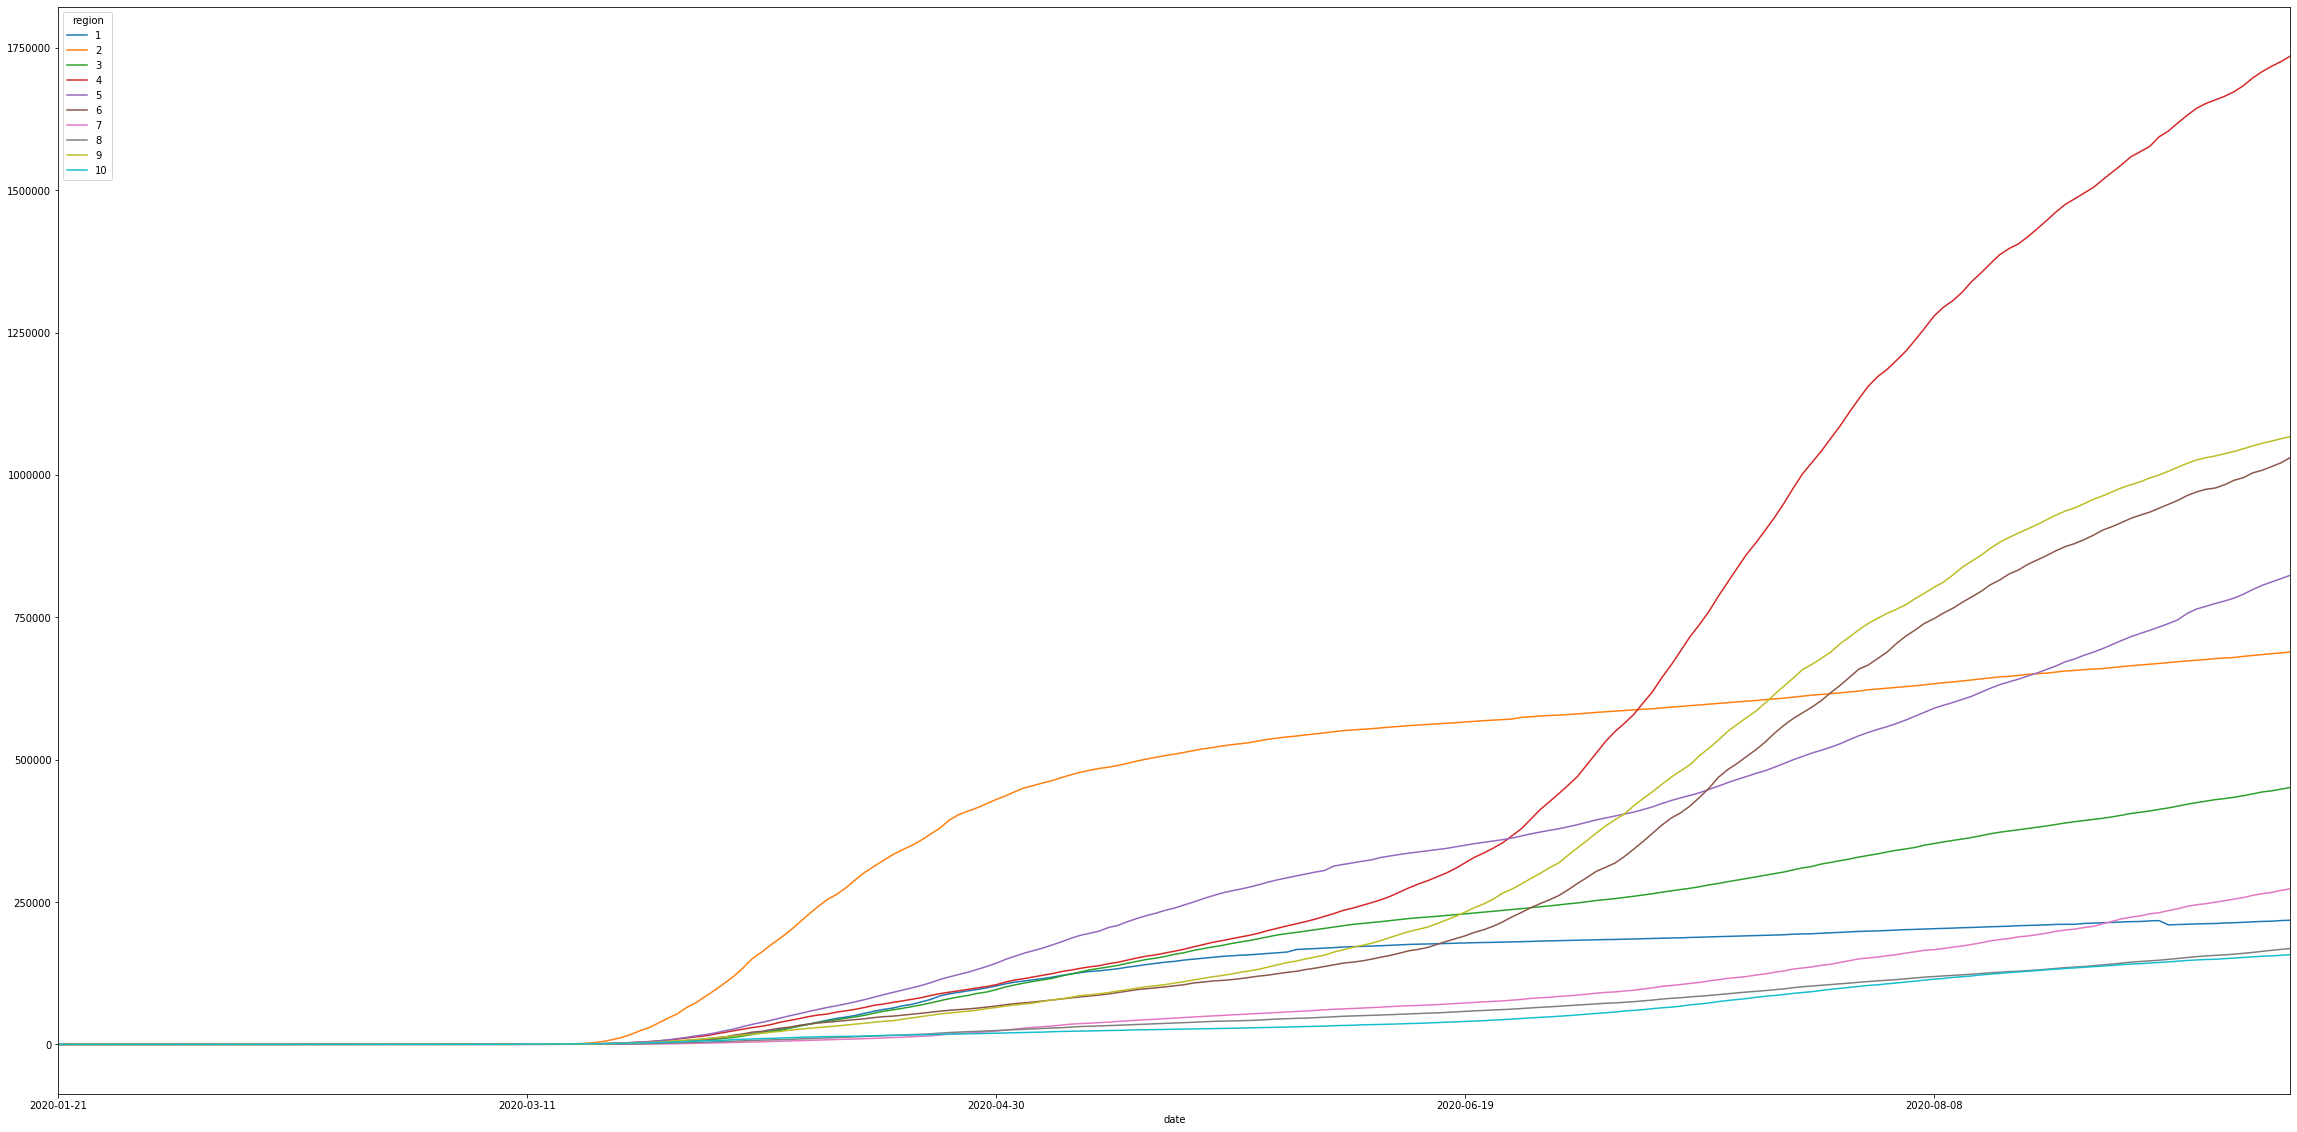

In [17]:
# simple visual
sum_case.unstack().plot(figsize=(200,100))

In [ ]:
# output csv file
formatted_case.to_csv('/Users/apple/PycharmProjects/usCOVID/output/case_sum_us_region.csv')

In [9]:
# same step for the death column
sum_death = case_input.groupby(['date', 'region'])['deaths'].sum()
formatted_death = sum_death.unstack().transpose()
formatted_death

date,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,...,2020-09-06,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13,2020-09-14,2020-09-15
region,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,15273,15281,15299,15307,15337,15357,15375,15391,15409,15421
2,0,0,0,0,0,0,0,0,0,0,...,49068,49085,49108,49138,49162,49183,49206,49218,49234,49268
3,0,0,0,0,0,0,0,0,0,0,...,15780,15810,15825,15873,15912,15945,15967,15974,16030,16147
4,0,0,0,0,0,0,0,0,0,0,...,31291,31346,31473,31907,32371,32771,33030,33147,33262,33609
5,0,0,0,0,0,0,0,0,0,0,...,25927,25963,26016,26181,26276,26400,26482,26517,26544,26697
6,0,0,0,0,0,0,0,0,0,0,...,21382,21454,21551,21730,21791,22140,22275,22402,22480,22831
7,0,0,0,0,0,0,0,0,0,0,...,3800,3805,3831,3887,3917,3966,3996,4011,4035,4064
8,0,0,0,0,0,0,0,0,0,0,...,2895,2897,2900,2910,2924,2942,2957,2961,2978,2988
9,0,0,0,0,0,0,0,0,0,0,...,20448,20482,20568,20770,20918,21117,21224,21286,21363,21566


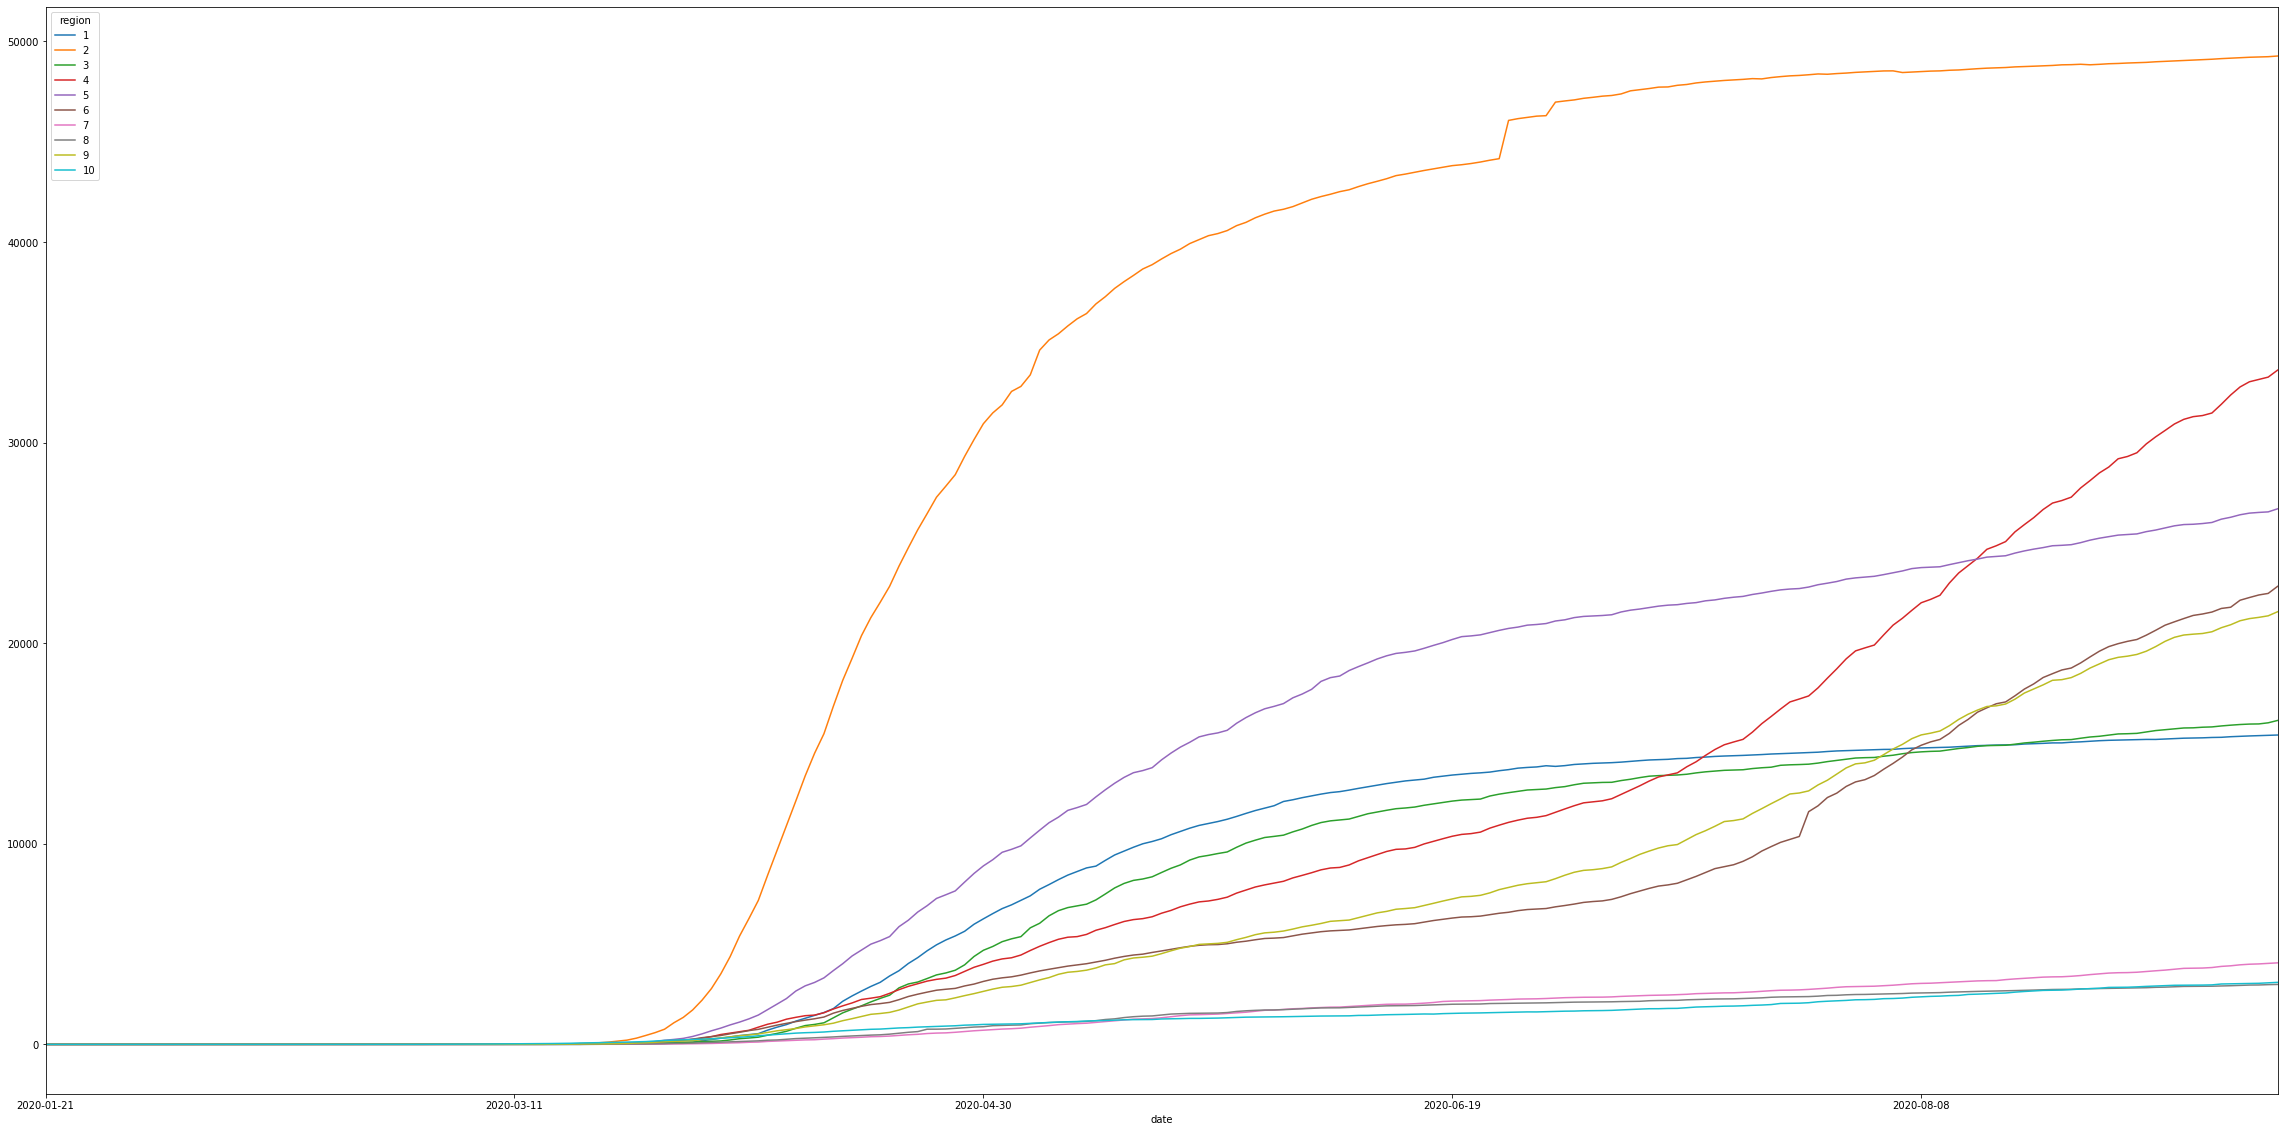

In [18]:
sum_death.unstack().plot(figsize=(40,20))

In [ ]:
formatted_death.to_csv('/Users/apple/PycharmProjects/usCOVID/output/death_sum_us_region.csv')